# Intro to Decision Classifier

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
X = iris.data
y = iris.target

## Train / Test: PENDING

## Train the Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Plot the tree

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = True
)

In [6]:
!dot -Tpng iris_tree.dot -o iris_tree.png

## Viz2

[Text(418.5, 498.3, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(482.8846153846154, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(257.53846153846155, 317.1, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(128.76923076923077, 226.5, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(386.3076923076923, 226.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(321.9230769

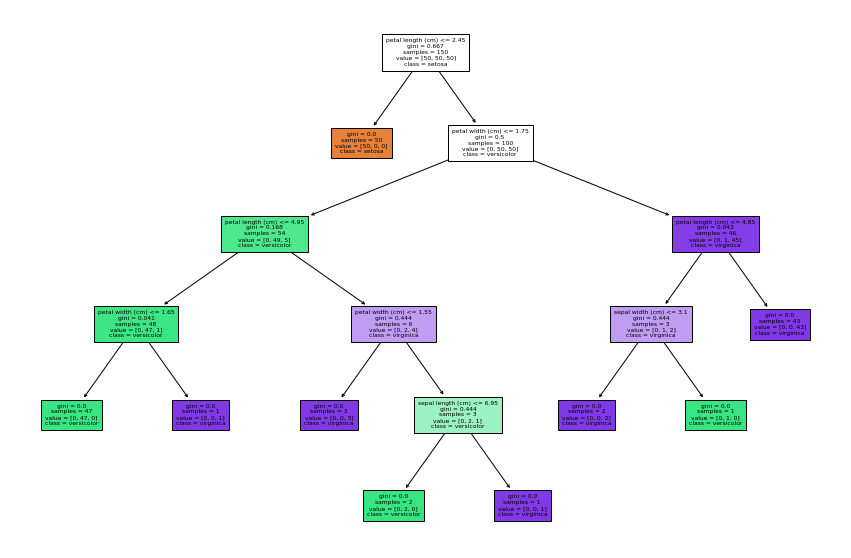

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,10))

tree.plot_tree(
    tree_clf,
    filled = True,
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    fontsize = 6
)

# Entropy

In [8]:
# max_depth
# 
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

[Text(418.5, 498.3, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(482.8846153846154, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(257.53846153846155, 317.1, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(128.76923076923077, 226.5, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(386.3076923076923, 226.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(321.923076923

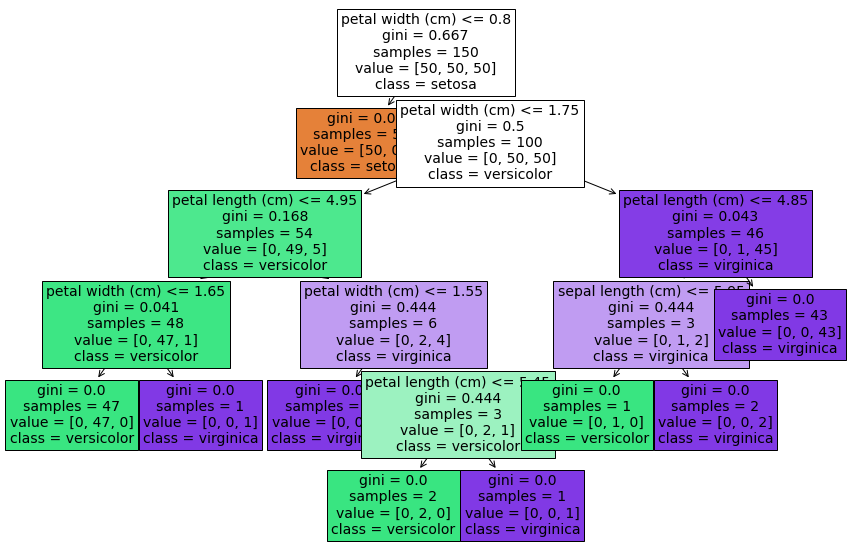

In [9]:
fig = plt.figure(figsize = (15,10))

tree.plot_tree(
    tree_clf,
    filled = True,
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    fontsize = 14
)

In [10]:
tree_clf.feature_importances_

array([0.01333333, 0.        , 0.06405596, 0.92261071])

In [11]:
# get importance
importance = tree_clf.feature_importances_

for i, v in enumerate(importance):
    print(f"Feature: {i}, score: {v}")

Feature: 0, score: 0.013333333333333329
Feature: 1, score: 0.0
Feature: 2, score: 0.06405595813204505
Feature: 3, score: 0.9226107085346216


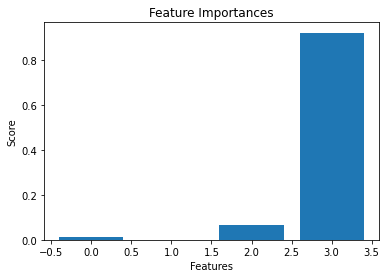

In [12]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

# Random Forest - Ensamble Methods

In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========